# The code below does the following:



*   PART 1: Prepare data (Import data and necessary packages)
*   PART 2: EDA plots
*   PART 3: Multiple Linear Regression Analysis


# PART 1: Prepare data

In [ ]:
# 1. Converts pdfs to text
# 2. Iterates through list of pdfs (using their file paths) running VADER sentiment analysis
# 3. Prints sentiment scores for each script into a large dataframe

!pip install PyPDF2
import PyPDF2
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd

nltk.download('vader_lexicon')

def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF file."""
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

def analyze_sentiment(text):
    """Analyzes sentiment of the given text using VADER."""
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores

if __name__ == '__main__':
    pdf_paths = [
        "/content/Barry_1x01.pdf",
        "/content/Lost_1x01_-_Pilot.pdf",
        "/content/Mindhunter_1x01_-_Pilot.pdf",
        "/content/Dead_to_Me_1x01_-_Pilot.pdf",
        "/content/BREAKING_BAD_-_PILOT.pdf",
        "/content/Dexter_-_Pilot.pdf",
        "/content/Game_of_Thrones_Pilot_Script_.pdf",
        "/content/Mad_Men_-_Pilot.pdf",
        "/content/Peaky_Blinders.pdf",
        "/content/The_Office_U_S_Pilot.pdf",
        "/content/The_Sopranos_-_Pilot.pdf",
        "/content/Baby_Reindeer_1x01.pdf",
        "/content/Cruel_Intentions_1x01_-_I.pdf",
        "/content/Station_Eleven_1x01_-_Wheel_of_Fire.pdf",
        "/content/Ghosted_1x01_-_Pilot.pdf",
        "/content/Girlboss_1x01_-_Pilot.pdf",
        "/content/Gossip_Girl_1x01_-Pilot.pdf",
        "/content/How_I_Met_Your_Mother_-_Pilot.pdf",
        "/content/Jane_the_Virgin_1x01_-_Pilot.pdf",
        "/content/the-good-place-101-everything-is-great-2017.pdf"
    ]

    # create list to hold sentiment results
    results = []

    for pdf_path in pdf_paths:
        text = extract_text_from_pdf(pdf_path) # extract text from PDF

        sentiment_scores = analyze_sentiment(text) # analyze sentiment of extracted text

        show_name = pdf_path.split("/")[-1].replace(".pdf", "")  # extract file name as show name
        results.append({                                          # analyze sentiment of the extracted text
            "Show_Name": show_name,
            "Positive": sentiment_scores['pos'],
            "Negative": sentiment_scores['neg'],
            "Neutral": sentiment_scores['neu'],
            "Compound": sentiment_scores['compound']
        })

# final df of sentiment results
    df = pd.DataFrame(results)
    print(df)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: '/content/Barry_1x01.pdf'

# PART 2: EDA Plots

In [1]:
# read in excel to df

import pandas as pd
df = pd.read_excel("all_sentiment_scores.xlsx")
print(df)

                Show_Name  Positive  Negative  Neutral  Compound  Runtime
0                   Barry     0.108     0.099    0.794    0.9974        4
1                    Lost     0.084     0.103    0.813   -1.0000        6
2              Mindhunter     0.077     0.088    0.835   -0.9996        2
3              Dead_to_Me     0.137     0.143    0.720   -0.9993        3
4            Breaking_Bad     0.081     0.091    0.828   -0.9995        5
5                  Dexter     0.105     0.119    0.776   -0.9997        8
6         Game_of_Thrones     0.121     0.100    0.779    0.9999        8
7                 Mad_Men     0.153     0.069    0.778    1.0000        7
8          Peaky_Blinders     0.102     0.086    0.812    0.9998        6
9              The_Office     0.147     0.076    0.777    0.9999        9
10           The_Sopranos     0.095     0.086    0.819    0.9986        6
11          Baby_Reindeer     0.141     0.076    0.783    1.0000        1
12       Cruel_Intentions     0.131   

### Plot 1

<Axes: xlabel='Number of Seasons', ylabel='Positive'>

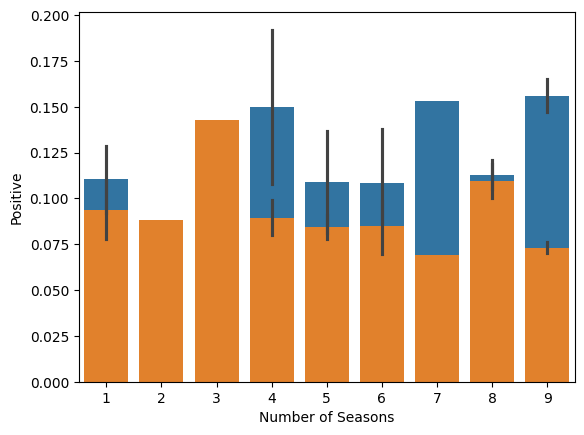

In [2]:
# Bar plot of postive negative sentiment vs run time
df = df.assign(**{'Number of Seasons': [4, 6, 2, 3, 5, 8, 8, 7, 6, 9, 6, 1, 1, 1, 1, 1, 6, 9, 5, 4]})

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = 'Number of Seasons', y = 'Positive', data = df)

sns.barplot(x = 'Number of Seasons', y = 'Negative', data = df)

### Plot 2

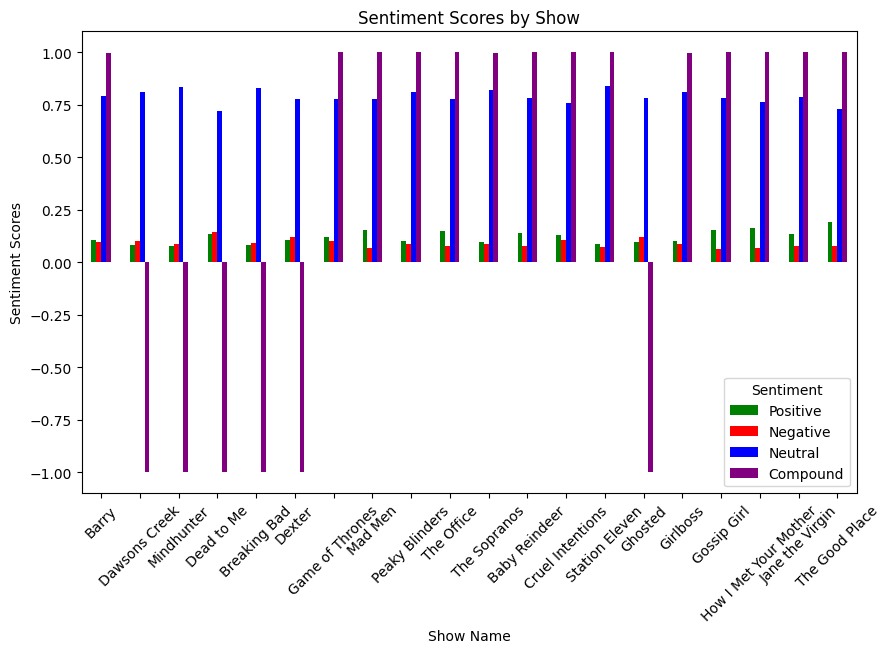

In [3]:
# Bar plot for individual sentiment scores
import matplotlib.pyplot as plt

df.set_index("Show_Name")[["Positive", "Negative", "Neutral", "Compound"]].plot(
    kind="bar", figsize=(10, 6), color=["green", "red", "blue", "purple"]
)
plt.title("Sentiment Scores by Show")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
 ['Barry', 'Dawsons Creek', 'Mindhunter', 'Dead to Me', 'Breaking Bad', 'Dexter', 'Game of Thrones', 'Mad Men',
  'Peaky Blinders', 'The Office', 'The Sopranos', 'Baby Reindeer', 'Cruel Intentions', 'Station Eleven',
  'Ghosted','Girlboss','Gossip Girl','How I Met Your Mother','Jane the Virgin', 'The Good Place'])
plt.xlabel("Show Name")
plt.ylabel("Sentiment Scores")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

### Plot 3

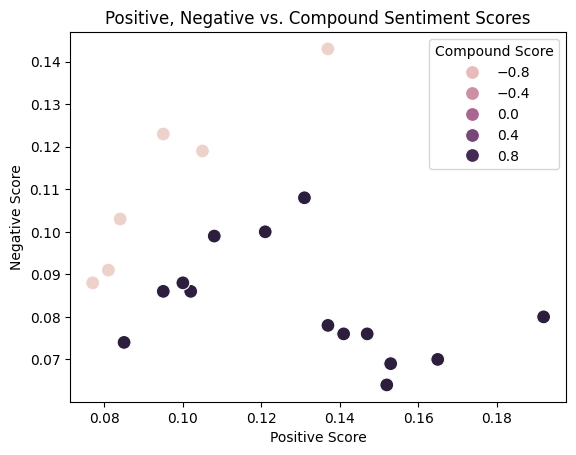

In [4]:
# Positive, Negative and Compound Score as grouped scatterplot (by color)
import seaborn as sns

sns.scatterplot(data=df, x="Positive", y="Negative", hue="Compound", s=100)
plt.title("Positive, Negative vs. Compound Sentiment Scores")
plt.xlabel("Positive Score")
plt.ylabel("Negative Score")
plt.legend(title="Compound Score")
plt.show()

# PART 3: Multiple Linear Regression Analysis

In [5]:
# read in excel to df

import pandas as pd
df = pd.read_excel("all_sentiment_scores.xlsx")
print(df)

                Show_Name  Positive  Negative  Neutral  Compound  Runtime
0                   Barry     0.108     0.099    0.794    0.9974        4
1                    Lost     0.084     0.103    0.813   -1.0000        6
2              Mindhunter     0.077     0.088    0.835   -0.9996        2
3              Dead_to_Me     0.137     0.143    0.720   -0.9993        3
4            Breaking_Bad     0.081     0.091    0.828   -0.9995        5
5                  Dexter     0.105     0.119    0.776   -0.9997        8
6         Game_of_Thrones     0.121     0.100    0.779    0.9999        8
7                 Mad_Men     0.153     0.069    0.778    1.0000        7
8          Peaky_Blinders     0.102     0.086    0.812    0.9998        6
9              The_Office     0.147     0.076    0.777    0.9999        9
10           The_Sopranos     0.095     0.086    0.819    0.9986        6
11          Baby_Reindeer     0.141     0.076    0.783    1.0000        1
12       Cruel_Intentions     0.131   

In [6]:
# gives coefficients
import pandas
from sklearn import linear_model

X = df[['Positive', 'Negative', 'Neutral', 'Compound']]
y = df['Runtime']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)
# interpreting results:
# increase in 1 of sentiment score, gives a increase/decrease in runtime
# A positive 𝛽 means the variable is positively associated with runtime, while a negative 𝛽 indicates a negative association

[-2.21287675e+03 -2.26381786e+03 -2.23415258e+03 -2.84808484e-01]


In [7]:
# predict the runtime given the following 4 sentiment scores:

# heavy on the positive side
predictedRuntimePOS = regr.predict([[0.7, 0.2, 0.1, 1]])
print(predictedRuntimePOS)

# heavy on the negative side
predictedRuntimeNEG = regr.predict([[0.1, 0.6, 0.3, -1]])
print(predictedRuntimeNEG)

# heavy on the neutral side
predictedRuntimeNEU = regr.predict([[0.15, 0.15, 0.7, 0]])
print(predictedRuntimeNEU)

[13.80189388]
[-10.26010226]
[3.86825803]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# standardize the predictors
scaler = StandardScaler()
X[['Positive', 'Negative', 'Neutral', 'Compound']] = scaler.fit_transform(X[['Positive', 'Negative', 'Neutral', 'Compound']])

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Runtime   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.224
Date:                Thu, 13 Feb 2025   Prob (F-statistic):              0.342
Time:                        16:51:04   Log-Likelihood:                -45.739
No. Observations:                  20   AIC:                             101.5
Df Residuals:                      15   BIC:                             106.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6500      0.615      7.560      0.0

<ipython-input-8-773f3fa41ab8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Positive', 'Negative', 'Neutral', 'Compound']] = scaler.fit_transform(X[['Positive', 'Negative', 'Neutral', 'Compound']])


### Some observations: Looks like there is no significance for any of the coefficients (all p values > 0.05) and the adjusted r-squared is very low indicating the model does not explain much variability in the data.

*   model is not significant
*   adj r-squared shows proportion of the variance in the dependent variable explained by the independent variables, the low value indicates not a good fit
* no predictors are significant in the model

### Plot 4 (run after MLR analysis section)

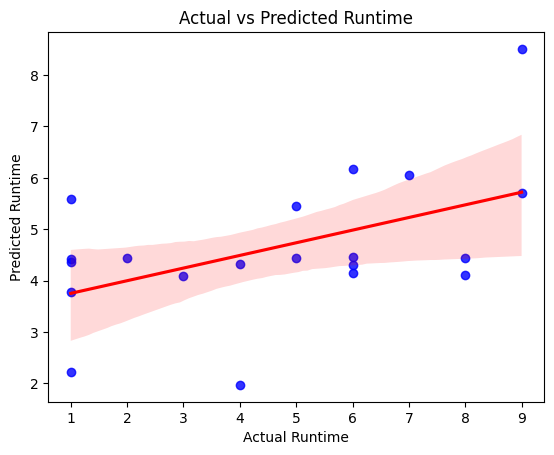

In [9]:
# predict runtime
y_pred = model.predict(X)

# graph
sns.regplot(x=y, y=y_pred, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.xlabel('Actual Runtime')
plt.ylabel('Predicted Runtime')
plt.title('Actual vs Predicted Runtime')
plt.show()